<h1>Capstone Project - The Battle of Neighborhoods 

<h2>1. Introduction

<h3>Background:

To the freshmen entering the university, finding a suitable apartment near the university is an important issue.

<h3>Problem：

In this scenario, our client is a student who have been offered from New York University. He has lived in the downtown of Toronto for 18 years and enjoyed many amenities in his home area, such as grocery shops, cafes, international restaurants and entertainments. Now the client wants to find a convenient and suitable place which has the similar living environment he enjoyed. 

Our client wants to find the most suitable area for living and set some demands of the apartment to make evaluations of the rental options in Manhattan: 

1.	Apartment with 2 bedrooms & 2 bathrooms
2.	Less than $5000 per month
3.	Close to NYU
4.	Near to grocery shops, international restaurants, coffee shops 

<h3>Targeted audience:

This scenario can be applied on any college freshmen who are moving to a new place for study. This methodology can be adjusted to satisfy anyone who are going to move to a new city, a new place.

<h2>2. Data

<h3>Data Description:

1. The Data of Downtown Toronto: a csv file(toronto_merged.csv) produced from the previous assignment was applied here.

2. Extract the neighborhoods of the NYC from the following link: https://geo.nyu.edu/catalog/nyu_2451_34572

3. Geodata (latitude & longitude) of NYU & its neighborhoods: Geocoder Python package	

4. Apartments for rent with additional requirements ($3000/month, 2B2B, etc):https://www.apartments.com/off-campus-housing/ny/new-york/new-york-university-washington-square-campus/apartments/2-bedrooms-2-bathrooms-under-3000/student-housing/?bb=8qk_7q33vHzs555c 


<h2>3. Methodoloy

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!pip install geopy
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium 
from folium import plugins
import seaborn as sns
import time
print('Libraries imported.')

Libraries imported.


<h3>The Data of Downtown Toronto

<h4>How was the hometown of our client like? First of all, the data of Toronto downtown should be collected to compare with the data of the neighborhood of NYU. Here, the csv file produced from the previous assignment was applied here.
    
    

In [2]:
torontoDT_merged = pd.read_csv('toronto_merged.csv') 
torontoDT_merged.head()

,Unnamed: 0,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Trail,Playground,Deli / Bodega,Electronics Store,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
1,1,M4X,Downtown Toronto,St. James Town / Cabbagetown,43.667967,-79.367675,1,Coffee Shop,Pizza Place,Restaurant,Pub,Italian Restaurant,Bakery,Café,Caribbean Restaurant,Breakfast Spot,Plaza
2,2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Japanese Restaurant,Coffee Shop,Gay Bar,Restaurant,Sushi Restaurant,Yoga Studio,Men's Store,Mediterranean Restaurant,Burger Joint,Café
3,3,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,4,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,Mexican Restaurant,Café,Ice Cream Shop,Shoe Store,Beer Store
4,4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Cosmetics Shop,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Café,Bookstore,Theater,Thai Restaurant


In [3]:
Cluster_Lables_count = dict(torontoDT_merged['Cluster Labels'].value_counts())
Cluster_Lables_count

{1: 13, 4: 3, 3: 1, 2: 1, 0: 1}

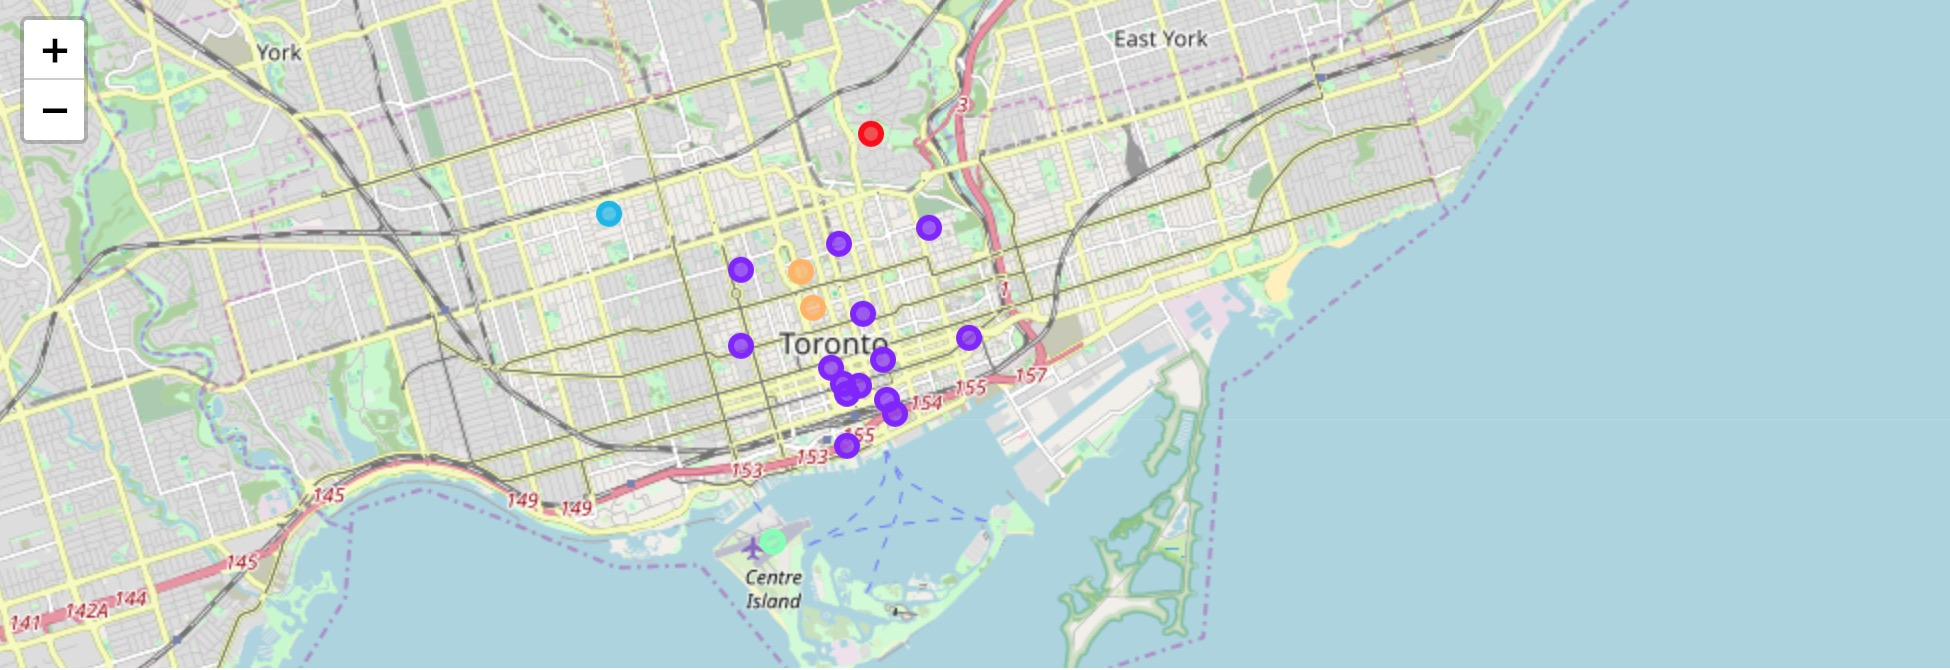

<h4>As shown above in both table and map, Cluster 1 is the most representative, therefore the data of Cluster 1 were extracted and analyzed.

In [4]:
Cluster_1=torontoDT_merged.loc[torontoDT_merged['Cluster Labels'] == 1, torontoDT_merged.columns[[1] + list(range(5, torontoDT_merged.shape[1]))]]
Cluster_1

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4X,-79.367675,1,Coffee Shop,Pizza Place,Restaurant,Pub,Italian Restaurant,Bakery,Café,Caribbean Restaurant,Breakfast Spot,Plaza
2,M4Y,-79.383160,1,Japanese Restaurant,Coffee Shop,Gay Bar,Restaurant,Sushi Restaurant,Yoga Studio,Men's Store,Mediterranean Restaurant,Burger Joint,Café
4,M5B,-79.378937,1,Clothing Store,Coffee Shop,Cosmetics Shop,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Café,Bookstore,Theater,Thai Restaurant
5,M5C,-79.375418,1,Coffee Shop,Café,Restaurant,American Restaurant,Cocktail Bar,Beer Bar,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Diner
6,M5E,-79.373306,1,Coffee Shop,Cocktail Bar,Seafood Restaurant,Café,Beer Bar,Farmers Market,Bakery,Restaurant,Cheese Shop,Hotel
8,M5H,-79.384568,1,Restaurant,Coffee Shop,Café,Bar,Bakery,Thai Restaurant,Gym,Asian Restaurant,Juice Bar,Concert Hall
9,M5J,-79.381752,1,Coffee Shop,Aquarium,Italian Restaurant,Hotel,Café,Restaurant,Brewery,Fried Chicken Joint,Sporting Goods Shop,Scenic Lookout
10,M5K,-79.381576,1,Coffee Shop,Café,Hotel,Restaurant,Gastropub,Bar,Seafood Restaurant,American Restaurant,Tea Room,Asian Restaurant
11,M5L,-79.379817,1,Coffee Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Seafood Restaurant,Gastropub,Japanese Restaurant,Bar
12,M5S,-79.400049,1,Café,Japanese Restaurant,Bar,Bookstore,Restaurant,Bakery,Chinese Restaurant,Dessert Shop,College Arts Building,Flower Shop


In [5]:
First_most_count = dict(Cluster_1['1st Most Common Venue'].value_counts())
First_most_count

{'Coffee Shop': 8,
 'Café': 2,
 'Japanese Restaurant': 1,
 'Restaurant': 1,
 'Clothing Store': 1}

<h4>New York University is located in Greenwich Village, Lower Manhattan. So the cluster neighborhood data of Greenwich Village area would be collected.

In [6]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [12]:
GV_data = manhattan_data[manhattan_data['Neighborhood'] == 'Greenwich Village'].reset_index(drop=True)
GV_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Greenwich Village,40.726933,-73.999914


In [13]:
address = 'Greenwich Village, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7319802, -73.9965658.


In [14]:
CLIENT_ID = '5PJ3U0POKZS0TXI5QKZ5V1K5EJHV1U3QFDWVFYTEFNGZMRW3' 
CLIENT_SECRET = 'OKDJOLDWTUHNYZQ4QQIKFGJFIYLETOOZGIVOLH2511QZLESE' 
VERSION = '20200401' 

In [15]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5PJ3U0POKZS0TXI5QKZ5V1K5EJHV1U3QFDWVFYTEFNGZMRW3&client_secret=OKDJOLDWTUHNYZQ4QQIKFGJFIYLETOOZGIVOLH2511QZLESE&v=20200401&ll=40.7319802,-73.9965658&radius=500&limit=100'

In [16]:
results = requests.get(url).json()

In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Washington Square Park,Park,40.730816,-73.997458
1,Loring Place,American Restaurant,40.732882,-73.997635
2,Stumptown Coffee Roasters,Coffee Shop,40.732797,-73.997971
3,305 Fitness,Gym / Fitness Center,40.732754,-73.997510
4,Existing Conditions,Cocktail Bar,40.733050,-73.998159


In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [20]:
GV_onehot = pd.get_dummies(nearby_venues[['categories']], prefix="", prefix_sep="")
GV_grouped=GV_onehot.mean().reset_index()
GV_grouped.columns=['catagory','freq']
GV_grouped=GV_grouped.sort_values(by=['freq'],ascending=False)
GV_grouped.head()

,catagory,freq
31,Italian Restaurant,0.06
0,American Restaurant,0.05
10,Coffee Shop,0.05
12,Cosmetics Shop,0.04
9,Cocktail Bar,0.03


<h4> Compare the data of Greenwich Village to the data of downtown Toronto(Coffee Shop: 8,
                                                                           Café: 2,
                                                                           Japanese Restaurant: 1,
                                                                           Clothing Store: 1,
                                                                           Restaurant: 1), the living environment are highly similar. 
    Our client should be enjoy his new college life in Greenwich Village. 
    So next step, the rental data in Greenwich Village should be collected.

<h4>Useful rental data of Greenwich Village area was collected from https://www.apartments.com/apartments/greenwich-village-new-york-ny/2-bedrooms-2-bathrooms-under-5000/?bb=s5ih3zmwvH6rnv1B and summarized in a csv file for directly reading here.

In [21]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_2e1b90fa140f4b8ba08c53c29cdfb5b7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7bmnOULGDgeaIVm6k6K5Y8E5eNB2HbSs8KEb-O7tuhGo',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2e1b90fa140f4b8ba08c53c29cdfb5b7.get_object(Bucket='jupyternotebook2-donotdelete-pr-syvotew1nbcrps',Key='GV-Rent.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

GV_rent = pd.read_csv(body)
GV_rent

,Address,Rental_Price,Postal_Code,Latitude,Longitude
0,30 W 18th St Unit 3F,4840,NY10011,40.73902,-73.99358
1,25W 19th St Unit 4-F,4195,NY10011,40.73987,-73.99269
2,209 E 10th St Unit 2,4000,NY10003,40.72968,-73.98601
3,209 E 10th St Unit 2-A,4000,NY10003,40.72968,-73.98601
4,17 King St Unit 4W,4500,NY10014,40.72779,-74.00341
5,240 Mulberry St Unit 16,4900,NY10012,40.72278,-73.99567
6,28 St Marks PI Unit 3A,4095,NY10003,40.72873,-73.98865


In [22]:
latitude=40.726933
longitude= -73.999914
map_GV_rent = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(GV_rent['Latitude'], GV_rent['Longitude'], '$'+GV_rent['Rental_Price'].astype(str)+','+GV_rent['Address']):
   
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_GV_rent)  
    
map_GV_rent

<h4> Now the cluster venues around each apartment should be examined. 

In [23]:
CLIENT_ID = '5PJ3U0POKZS0TXI5QKZ5V1K5EJHV1U3QFDWVFYTEFNGZMRW3' 
CLIENT_SECRET = 'OKDJOLDWTUHNYZQ4QQIKFGJFIYLETOOZGIVOLH2511QZLESE' 
VERSION = '20200330'

radius=50
LIMIT=10

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
rent_venues = getNearbyVenues(names=GV_rent['Address'],
                                   latitudes=GV_rent['Latitude'],
                                   longitudes=GV_rent['Longitude']
                                  )

30 W 18th St Unit 3F
25W 19th St Unit 4-F
209 E 10th St Unit 2
209 E 10th St Unit 2-A
17 King St Unit 4W
240 Mulberry St Unit 16
28 St Marks PI Unit 3A


In [26]:
print(rent_venues.shape)
rent_venues.head()

(45, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,30 W 18th St Unit 3F,40.73902,-73.99358,Books of Wonder,40.739073,-73.993237,Bookstore
1,30 W 18th St Unit 3F,40.73902,-73.99358,The YinOva Center,40.738846,-73.993996,Acupuncturist
2,30 W 18th St Unit 3F,40.73902,-73.99358,SWERVE Fitness,40.739169,-73.993471,Cycle Studio
3,30 W 18th St Unit 3F,40.73902,-73.99358,Scampi,40.739186,-73.993609,Italian Restaurant
4,30 W 18th St Unit 3F,40.73902,-73.99358,Paper Presentation,40.739085,-73.993135,Paper / Office Supplies Store


In [27]:
rent_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
17 King St Unit 4W,3,3,3,3,3,3
209 E 10th St Unit 2,9,9,9,9,9,9
209 E 10th St Unit 2-A,9,9,9,9,9,9
240 Mulberry St Unit 16,7,7,7,7,7,7
25W 19th St Unit 4-F,5,5,5,5,5,5
28 St Marks PI Unit 3A,7,7,7,7,7,7
30 W 18th St Unit 3F,5,5,5,5,5,5


In [28]:
rent_onehot = pd.get_dummies(rent_venues[['Venue Category']], prefix="", prefix_sep="")
rent_onehot['Neighborhood'] = rent_venues['Neighborhood'] 
fixed_columns = [rent_onehot.columns[-1]] + list(rent_onehot.columns[:-1])
rent_onehot.head()

,Acupuncturist,Bookstore,Bubble Tea Shop,Café,Chinese Restaurant,Coffee Shop,Cycle Studio,Department Store,Dessert Shop,Gym,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Mediterranean Restaurant,Optical Shop,Paper / Office Supplies Store,Pizza Place,Record Shop,Salon / Barbershop,Shabu-Shabu Restaurant,Spa,Szechuan Restaurant,Taiwanese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Neighborhood
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30 W 18th St Unit 3F
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30 W 18th St Unit 3F
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30 W 18th St Unit 3F
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30 W 18th St Unit 3F
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30 W 18th St Unit 3F


In [29]:
rent_grouped = rent_onehot.groupby('Neighborhood').mean().reset_index()
rent_grouped

,Neighborhood,Acupuncturist,Bookstore,Bubble Tea Shop,Café,Chinese Restaurant,Coffee Shop,Cycle Studio,Department Store,Dessert Shop,Gym,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Mediterranean Restaurant,Optical Shop,Paper / Office Supplies Store,Pizza Place,Record Shop,Salon / Barbershop,Shabu-Shabu Restaurant,Spa,Szechuan Restaurant,Taiwanese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop
0,17 King St Unit 4W,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.333333
1,209 E 10th St Unit 2,0.0,0.0,0.000000,0.000000,0.000000,0.111111,0.0,0.000000,0.111111,0.0,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.111111,0.0,0.111111,0.0,0.000000,0.000000,0.111111,0.111111,0.000000
2,209 E 10th St Unit 2-A,0.0,0.0,0.000000,0.000000,0.000000,0.111111,0.0,0.000000,0.111111,0.0,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.111111,0.111111,0.0,0.111111,0.0,0.000000,0.000000,0.111111,0.111111,0.000000
3,240 Mulberry St Unit 16,0.0,0.0,0.000000,0.142857,0.000000,0.000000,0.0,0.142857,0.000000,0.0,0.428571,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857
4,25W 19th St Unit 4-F,0.0,0.0,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000
5,28 St Marks PI Unit 3A,0.0,0.0,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.142857,0.0,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.142857,0.142857,0.000000,0.000000,0.000000
6,30 W 18th St Unit 3F,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rent_grouped['Neighborhood']

for ind in np.arange(rent_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rent_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,17 King St Unit 4W,Wine Shop,Italian Restaurant,Mediterranean Restaurant,Japanese Curry Restaurant,Bookstore
1,209 E 10th St Unit 2,Dessert Shop,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Record Shop,Pizza Place
2,209 E 10th St Unit 2-A,Dessert Shop,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Record Shop,Pizza Place
3,240 Mulberry St Unit 16,Italian Restaurant,Wine Shop,Café,Department Store,Paper / Office Supplies Store
4,25W 19th St Unit 4-F,Gym,Spa,Salon / Barbershop,Coffee Shop,Wine Shop
5,28 St Marks PI Unit 3A,Japanese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Bubble Tea Shop,Chinese Restaurant
6,30 W 18th St Unit 3F,Acupuncturist,Bookstore,Cycle Studio,Paper / Office Supplies Store,Italian Restaurant


In [32]:
kclusters = 3
rent_grouped_clustering = rent_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rent_grouped_clustering)
kmeans.labels_[0:10]

array([1, 2, 2, 1, 0, 2, 1], dtype=int32)

In [33]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rent_merged = GV_rent
rent_merged = rent_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Address')
rent_merged

,Address,Rental_Price,Postal_Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,30 W 18th St Unit 3F,4840,NY10011,40.73902,-73.99358,1,Acupuncturist,Bookstore,Cycle Studio,Paper / Office Supplies Store,Italian Restaurant
1,25W 19th St Unit 4-F,4195,NY10011,40.73987,-73.99269,0,Gym,Spa,Salon / Barbershop,Coffee Shop,Wine Shop
2,209 E 10th St Unit 2,4000,NY10003,40.72968,-73.98601,2,Dessert Shop,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Record Shop,Pizza Place
3,209 E 10th St Unit 2-A,4000,NY10003,40.72968,-73.98601,2,Dessert Shop,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Record Shop,Pizza Place
4,17 King St Unit 4W,4500,NY10014,40.72779,-74.00341,1,Wine Shop,Italian Restaurant,Mediterranean Restaurant,Japanese Curry Restaurant,Bookstore
5,240 Mulberry St Unit 16,4900,NY10012,40.72278,-73.99567,1,Italian Restaurant,Wine Shop,Café,Department Store,Paper / Office Supplies Store
6,28 St Marks PI Unit 3A,4095,NY10003,40.72873,-73.98865,2,Japanese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Bubble Tea Shop,Chinese Restaurant


In [34]:
latitude=40.726933
longitude= -73.999914
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(rent_merged['Latitude'], rent_merged['Longitude'], rent_merged['Address'], rent_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
rent_merged.loc[rent_merged['Cluster Labels'] == 1, rent_merged.columns[[1] + list(range(5, rent_merged.shape[1]))]]


,Rental_Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4840,1,Acupuncturist,Bookstore,Cycle Studio,Paper / Office Supplies Store,Italian Restaurant
4,4500,1,Wine Shop,Italian Restaurant,Mediterranean Restaurant,Japanese Curry Restaurant,Bookstore
5,4900,1,Italian Restaurant,Wine Shop,Café,Department Store,Paper / Office Supplies Store


In [36]:
rent_merged.loc[rent_merged['Cluster Labels'] == 2, rent_merged.columns[[1] + list(range(5, rent_merged.shape[1]))]]


,Rental_Price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,4000,2,Dessert Shop,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Record Shop,Pizza Place
3,4000,2,Dessert Shop,Vegetarian / Vegan Restaurant,Shabu-Shabu Restaurant,Record Shop,Pizza Place
6,4095,2,Japanese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Bubble Tea Shop,Chinese Restaurant


<h2>4. Result

Based on the data methodology seciton, the belowing apartments were provided to our client for him to make decision.
    	
   	

**240 Mulberry St Unit 16 : $4900**


**17 King St Unit 4W : $4500**

<h2>5. Discussion

According to the client's requirement which is the apartment should be close to grocery shops, cafes, international restaurants and entertainments, **240 Mulberry St Unit 16** best meets these requirments with Italian restarant, wine shop cafe as well as department store surrounded. In the meanwhile, the rent is also within his budget. However, **17 King St Unit 4W** is another choice for him. This apartment is close to various international restaurants with a lower rental price at the same time. 

<h2>6. Conclusion

After all the considerations above, I would most recommend **240 Mulberry St Unit 16** to my client.